# 07 - KNN (K-Nearest Neighbors)

In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [23]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Initialize Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees in the forest
    max_depth=None,  # Grow trees until all leaves are pure
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,  # Minimum samples required at a leaf node
    random_state=42
)

In [26]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [27]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# very good results, but CatBoost had 89

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       609
           1       0.85      0.80      0.83       443

    accuracy                           0.86      1052
   macro avg       0.86      0.85      0.85      1052
weighted avg       0.86      0.86      0.86      1052



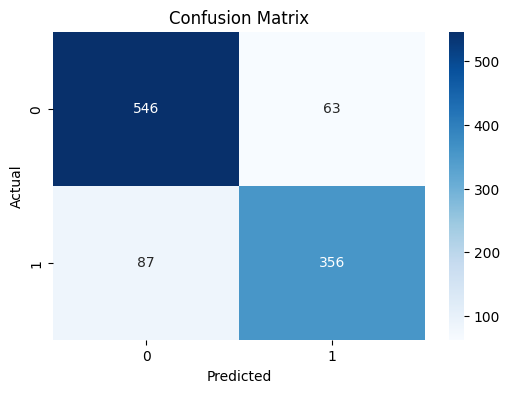

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix is a bit better in CatBoost too